<img src="https://brand.umich.edu/assets/brand/style-guide/logo-guidelines/U-M_Logo-Horizontal-Hex.png" alt="Drawing" style="width: 300px;" align="left"/><br>
    
## Week 3: Investigating the biases of predictive models

Algorithmic bias and fairness is an important topic in machine learning and learning analytics research. All models are reflections of human decision-making and the data on which they are trained, which are both subject to biases. This week, we are going to use models to surface inequities for students. Thus, we want you to develop a data product that we can use in the future to identify where we might need to improve how we serve and prepare students.   

As we mentioned at the start of the week, we want you to read through the paper by Gardner, Brooks, and Baker (2019) likested in the readings from this week and create the visualization they describe using OU data. To accomplish this task, you will build a supervised model to predict whether students pass or fail based on demographics data only (**Part A**) and compute its Absolute Between-ROC Area (**Part B**). You will then incorporate TMA and VLE data into the model (**Part C**) and evaluate the Absolute Between-ROC Area and AUC for this second model (**Part D**).


**References**
* Gardner, J., Brooks, C., & Baker, R. (2019). Evaluating the fairness of predictive student models through slicing analysis. *In Proceedings of the 9th International Conference on Learning Analytics & Knowledge* (pp. 225-234). [[PDF]](https://homes.cs.washington.edu/~jpgard/papers/lak19_slicing.pdf)
* [A Tutorial on Fairness in Machine Learning by Ziyuan Zhong](https://towardsdatascience.com/a-tutorial-on-fairness-in-machine-learning-3ff8ba1040cb)


# Open University Learning Analytics (OULAD) dataset

Kuzilek, J., Hlosta, M., & Zdrahal, Z. (2017). Open university learning analytics dataset. Scientific data, 4, 170171. https://www.nature.com/articles/sdata2017171
## Data scheme
![](https://media.springernature.com/lw685/springer-static/image/art%3A10.1038%2Fsdata.2017.171/MediaObjects/41597_2017_Article_BFsdata2017171_Fig2_HTML.jpg)
## Course timeline
![](https://media.springernature.com/lw685/springer-static/image/art%3A10.1038%2Fsdata.2017.171/MediaObjects/41597_2017_Article_BFsdata2017171_Fig1_HTML.jpg)
## Relational database
* A module is a course
* A presentation is a semester (e.g., 2019J - Fall 2019, 2019B = Winter 2019)
* vle = virtual learning enviroment
![](https://analyse.kmi.open.ac.uk/resources/images/model.png)

---

## Part A (20 points)
Write a function that creates a supervised learning model to predict whether students pass or fail based on demographics data only:

* Create train_test_split with random_state = 42, stratified by outcome
* Standardize features using StandardScaler(). Only standardize the features after you split the data to avoid data leakage
* Apply a logistic regression (random_state=42)
* Return the ground truth label and the predicted probabilities for each gender, each disability status in the test set. 

The output should be a pd.DataFrame with the following columns: label, pred_proba, gender_F, disability_Y

In [1]:
### Cheking Part A qutograder

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Testing code: 

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score, precision_score
from sklearn.linear_model import LogisticRegression

# Import pre-procssed data
merge = pd.read_csv("assets/demog.csv")

# Extract feature columns and target column
y = np.array(merge[['outcome']]).ravel()
X = np.array(merge.drop(['outcome','code_module','code_presentation','id_student'], axis=1))

# Split data:

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 42, stratify= y)

# Standardize train and test features:
# initiate Scaler:
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)  #fit_transform
X_test_std = scaler.transform(X_test)        # Transform only

# Initiate model:
lr = LogisticRegression(random_state=42)

# fit model: 
lr.fit(X_train_std, y_train)

# predict model: 
y_pred = lr.predict(X_test_std)

# predict probability (outcome =1) 
y_proba_pass = lr.predict_proba(X_test_std)[:,1]

# Output gender dataframe: 
result = pd.DataFrame({'label': y_test, 'pred_proba': y_proba_pass, 'pred': y_pred, 'gender_F': X_test[:, 2], 'disability_Y': X_test[:, -1]})

result['pred'].sum()

5240

In [4]:
"""The output data frame should have 4 columns: label, pred_proba, gender_F, disability_Y"""

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score, precision_score
from sklearn.linear_model import LogisticRegression

def answer_a():
    # Import pre-procssed data
    merge = pd.read_csv("assets/demog.csv")

    # Extract feature columns and target column
    y = np.array(merge[['outcome']]).ravel()
    X = np.array(merge.drop(['outcome','code_module','code_presentation','id_student'], axis=1))

    # Split data:

    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 42, stratify= y)

    # Standardize train and test features:
    # initiate Scaler:
    scaler = StandardScaler()

    X_train_std = scaler.fit_transform(X_train)  #fit_transform
    X_test_std = scaler.transform(X_test)        # Transform only

    # Initiate model:
    lr = LogisticRegression(random_state=42)

    # fit model: 
    lr.fit(X_train_std, y_train)

    # predict model: 
    y_pred = lr.predict(X_test_std)

    # predict probability (outcome =1) 
    y_proba_pass = lr.predict_proba(X_test_std)[:,1]

    # Output gender dataframe: 
    result = pd.DataFrame({'label': y_test, 'pred_proba': y_proba_pass, 'pred': y_pred, 'gender_F': X_test[:, 2], 'disability_Y': X_test[:, -1]})

    return result
answer_a()

,label,pred_proba,pred,gender_F,disability_Y
0,0,0.616412,1,0,0
1,1,0.657388,1,0,0
2,1,0.835150,1,1,0
3,1,0.812145,1,0,0
4,1,0.661554,1,0,0
...,...,...,...,...,...
5605,1,0.606212,1,1,0
5606,1,0.761794,1,0,0
5607,1,0.635885,1,1,0
5608,0,0.737846,1,1,0


In [5]:
import pandas as pd
import numpy as np

# Check the number of courses
assert len(answer_a()) == 5610, 'Make sure to set random_state = 42 while doing train_test_split'

# Check y_pred
assert answer_a()['pred'].sum() == 5240, 'Your output is incorrect'


### Run the code below to plot the ROC curve for each gender

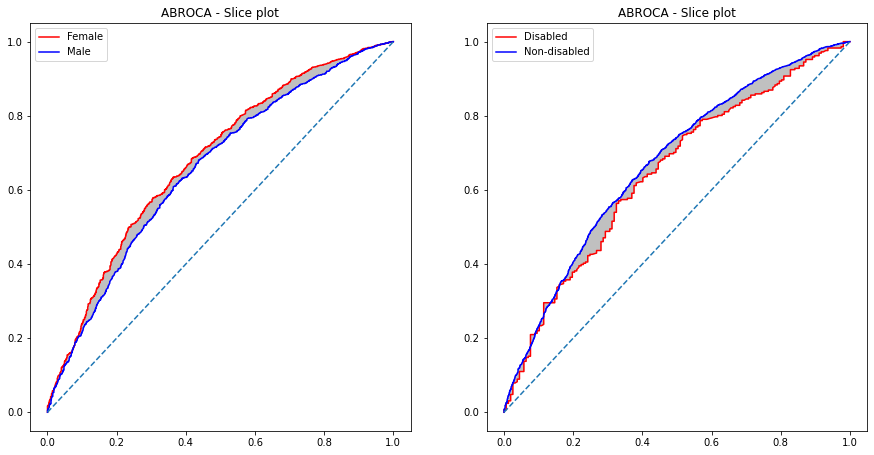

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(15,7.5))

from sklearn.metrics import roc_curve, roc_auc_score

# Import data from answer_a()
df_test = answer_a()

for i, j, label1, label2 in [('gender_F',0,'Female', 'Male'),
                             ('disability_Y',1,'Disabled', 'Non-disabled')]:

    # Getting predicted probabilities for each group
    y_score_1 = df_test.loc[df_test[i]==1,'pred_proba']
    y_score_2 = df_test.loc[df_test[i]==0,'pred_proba']

    # Getting labels for each group
    y_test_1 = df_test.loc[df_test[i]==1,'label']
    y_test_2 = df_test.loc[df_test[i]==0,'label']

    # Ploting ROC Curve

    # Creating true and false positive rates
    FPR1, TPR1, _ = roc_curve(y_test_1, y_score_1)
    FPR2, TPR2, _ = roc_curve(y_test_2, y_score_2)
     

    # Plot Female ROC
    axs[j].plot(
        FPR1,
        TPR1,
        label=label1,
        linestyle="-",
        color="r",
    )

    # Plot Male ROC
    axs[j].plot(
        FPR2,
        TPR2,
        label=label2,
        linestyle="-",
        color="b",
    )

    # Plot shaded area
    axs[j].fill(
        FPR1.tolist() + np.flipud(FPR2).tolist(),
        TPR1.tolist() + np.flipud(TPR2).tolist(),
        "y",
        color="silver"
    )

    # Plot diagonal line
    axs[j].plot([0, 1], ls="--")
    axs[j].legend()
    axs[j].set_title('ABROCA - Slice plot')



---

## Part B (40 points)

One way to measure the model fairness is to compute the shaded area between ROC curves, also known as the Absolute Between-ROC Area (ABROCA)

Write a function that 

* Compute the ABROCA

abroca = $\int\limits_0^1 |ROC_i{(t)} - ROC_j{(t)}|{dt}$
* Return the result by gender, and disability status

The output should be a dictionary { 'abroca_gender': abroca_gender, 'abroca_disability': abroca_disability}

Hints:
* To compute the integral between two curves, you might want to check out [integrate.quad](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html)
* To approximate an ROC curve, you might want to use [interpolate.interp1d](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html)

In [7]:
import sklearn.metrics as metrics
from scipy import interpolate
from scipy import integrate
import warnings
warnings.filterwarnings('ignore')

def answer_b():
    # Import data from answer_a()
    df_test = answer_a()
    
    abroca_gender = None
    abroca_disability = None

    # YOUR CODE HERE
    abroca = []
    
    # Get pred_proba from above code:
    for i in ['gender_F', 'disability_Y']: 
        # Getting predicted probabilities for each group
        y_score_1 = df_test.loc[df_test[i]==1,'pred_proba']
        y_score_2 = df_test.loc[df_test[i]==0,'pred_proba']

        # Get labels for each group
        y_test_1 = df_test.loc[df_test[i]==1,'label']
        y_test_2 = df_test.loc[df_test[i]==0,'label']
        
        # Compute ROC Curve: 

        # Create true and false positive rates
        FPR1, TPR1, _ = roc_curve(y_test_1, y_score_1)
        FPR2, TPR2, _ = roc_curve(y_test_2, y_score_2)

        # Approximate ROC curve function: 
        roc1 = interpolate.interp1d(FPR1, TPR1)
        roc2 = interpolate.interp1d(FPR2, TPR2)

        # Estimate approximate roc difference: 
        def abs_roc(t): 
            return abs(roc1(t) - roc2(t))

        # Integrate abroca from 0 to 1:
        abroca.append(integrate.quad(abs_roc, 0, 1)[0])


    #raise NotImplementedError()
    result = { 'abroca_gender': abroca[0], 'abroca_disability': abroca[1]}
    return result
answer_b()

{'abroca_gender': 0.02413403793090285,
 'abroca_disability': 0.02604183720708931}

In [8]:
import sklearn.metrics as metrics
from scipy import interpolate
from scipy import integrate
import warnings
warnings.filterwarnings('ignore')

# Assert output
x = answer_b()['abroca_gender'] + answer_b()['abroca_disability']
np.testing.assert_almost_equal(x, 0.0509, decimal=3, 
                               err_msg='Your output is not correct', verbose=False)

# Hidden test


---

## Part C (20 points)

So far we have used only demographics data. Let's incorporate the first 3 TMA scores and VLE data of the first 100 days to see how the model accuracy and fairness metrics would change. 

Write a function that creates a supervised learning model to predict whether students pass or fail based on demographics data and VLE data:

* Create train_test_split with random_state = 42, stratified by outcome
* Standardize features using StandardScaler(). Only standardize the features after you split the data to avoid data leakage
* Apply a logistic regression (random_state=42)
* Return the ground truth label and the predicted probabilities for each gender, each disability status in the test set. 

The output should be a pd.DataFrame with the following columns: label, pred_proba, gender_F, disability_Y

In [9]:
"""The output data frame should have 4 columns: label, pred_proba, gender_F, disability_Y"""

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score, precision_score
from sklearn.linear_model import LogisticRegression

# Same as part my part a code: 

def answer_c():
    # Import pre-procssed data
    df = pd.read_csv("assets/demogVLE.csv")

    # Extract feature columns and target column
    y = np.array(df[['outcome']]).ravel()
    X = np.array(df.drop(['outcome','code_module','code_presentation','id_student'], axis=1))

    # YOUR CODE HERE

    # Split data:

    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 42, stratify= y)

    # Standardize train and test features:
    # initiate Scaler:
    scaler = StandardScaler()

    X_train_std = scaler.fit_transform(X_train)  #fit_transform
    X_test_std = scaler.transform(X_test)        # Transform only

    # Initiate model:
    lr = LogisticRegression(random_state=42)

    # fit model: 
    lr.fit(X_train_std, y_train)

    # predict model: 
    y_pred = lr.predict(X_test_std)

    # predict probability (outcome =1) 
    y_proba_pass = lr.predict_proba(X_test_std)[:,1]

    # Output gender dataframe: 
    result = pd.DataFrame({'label': y_test, 'pred_proba': y_proba_pass, 'pred': y_pred, 'gender_F': X_test[:, 2], 'disability_Y': X_test[:, -6]})

    return result
    #raise NotImplementedError()
    
answer_c()

,label,pred_proba,pred,gender_F,disability_Y
0,0,0.564379,1,0.0,0.0
1,1,0.901418,1,0.0,0.0
2,1,0.937109,1,1.0,0.0
3,1,0.935098,1,0.0,0.0
4,1,0.927357,1,0.0,0.0
...,...,...,...,...,...
5605,1,0.568694,1,1.0,0.0
5606,1,0.853378,1,0.0,0.0
5607,1,0.321951,0,1.0,0.0
5608,0,0.924324,1,1.0,0.0


In [10]:
import pandas as pd
import numpy as np

# Check the number of courses
assert len(answer_c()) == 5610, 'Make sure to set random_state = 42 while doing train_test_split'

# Check y_pred
assert answer_c()['pred'].sum() == 4091, 'Your output is incorrect'


### Let's plot the ABROCA slice-plot to compare how the model accuracy and fairness has changed when we added assignment scores and VLE trace data of the first 100 days

Did you see any difference in accuracy and the disparaity gains between the two models?

Text(0.5, 1.0, 'ABROCA - Demographics+Assignment+VLE')

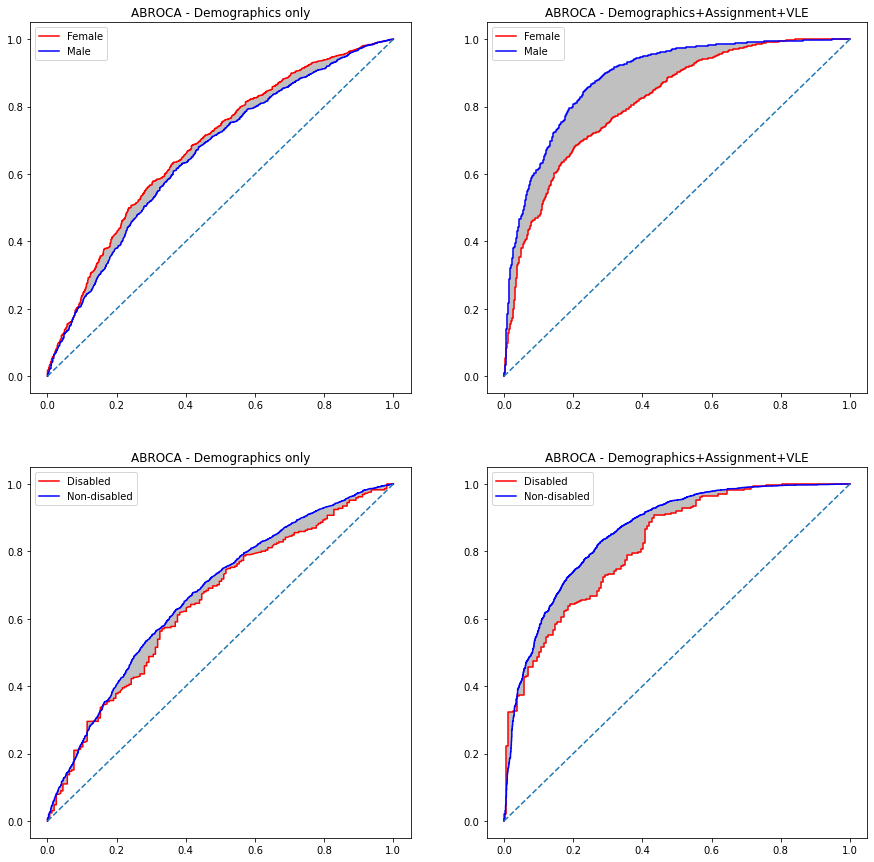

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(15,15))

from sklearn.metrics import roc_curve, roc_auc_score

# Import data from answer_a and answer_f
df1 = answer_a()
df2 = answer_c()

for df, i, x, y, label1, label2,  in [(df1,'gender_F',0,0,'Female', 'Male'),
                                     (df2,'gender_F',0,1,'Female', 'Male'),
                                     (df1,'disability_Y',1,0,'Disabled', 'Non-disabled'),
                                     (df2,'disability_Y',1,1,'Disabled', 'Non-disabled')]:

    # Getting predicted probabilities for each group
    y_score_1 = df.loc[df[i]==1,'pred_proba']
    y_score_2 = df.loc[df[i]==0,'pred_proba']

    # Getting labels for each group
    y_test_1 = df.loc[df[i]==1,'label']
    y_test_2 = df.loc[df[i]==0,'label']

    # Ploting ROC Curve

    # Creating true and false positive rates
    FPR1, TPR1, _ = roc_curve(y_test_1, y_score_1)
    FPR2, TPR2, _ = roc_curve(y_test_2, y_score_2)
     

    # Plot Female ROC
    axs[x, y].plot(
        FPR1,
        TPR1,
        label= label1,
        linestyle="-",
        color="r",
    )

    # Plot Male ROC
    axs[x, y].plot(
        FPR2,
        TPR2,
        label= label2,
        linestyle="-",
        color="b",
    )

    # Plot shaded area
    axs[x, y].fill(
        FPR1.tolist() + np.flipud(FPR2).tolist(),
        TPR1.tolist() + np.flipud(TPR2).tolist(),
        "y",
        color="silver"
    )

    # Plot diagonal line
    axs[x, y].plot([0, 1], ls="--")
    axs[x, y].legend()

axs[0, 0].set_title('ABROCA - Demographics only')
axs[1, 0].set_title('ABROCA - Demographics only')
axs[0, 1].set_title('ABROCA - Demographics+Assignment+VLE')
axs[1, 1].set_title('ABROCA - Demographics+Assignment+VLE')

---

## Part D (20 points)
Write a function that returns the 

* Absolute Between-ROC Area (ABROCA)
* AUC score

for gender and disability status using the predictive models in answer_a() and answer_c().

The output should consists of the following columns 

* Metrics
* Attribute
* Demog
* DemogVLE

In [17]:
# Testing a way to insert values in the dataframe: 
for df, i, x, y in [(df1,'gender_F',0,'Model A_Demog'),
                                     (df2,'gender_F',0,'Model F_DemogVLE'),
                                     (df1,'disability_Y',1,'Model A_Demog'),
                                     (df2,'disability_Y',1,'Model F_DemogVLE')]:
    print(x,y)

0 Model A_Demog
0 Model F_DemogVLE
1 Model A_Demog
1 Model F_DemogVLE


In [12]:
# Suppress all warnings
import warnings
warnings.filterwarnings("ignore")

from scipy import interpolate
from scipy import integrate
from sklearn import metrics

def answer_d():
    # Import data from previous answers
    df1 = answer_a()
    df2 = answer_c()
    
    # Create an empty dataframe
    result = pd.DataFrame({'Metrics': ['ABROCA']*2, 
                       'Attribute': ['Gender', 'Disability'],
                       'Model A_Demog': int(),
                       'Model F_DemogVLE': int()})
    result.loc[5] = ['AUC','All',0,0]
        
    # YOUR CODE HERE
    abroca = []
    
    # Get pred_proba from given code above:
    for df, i, x, y in [(df1,'gender_F',0,'Model A_Demog'),
                                     (df2,'gender_F',0,'Model F_DemogVLE'),
                                     (df1,'disability_Y',1,'Model A_Demog'),
                                     (df2,'disability_Y',1,'Model F_DemogVLE')]:

        # Getting predicted probabilities for each group
        y_score_1 = df.loc[df[i]==1,'pred_proba']
        y_score_2 = df.loc[df[i]==0,'pred_proba']

        # Getting labels for each group
        y_test_1 = df.loc[df[i]==1,'label']
        y_test_2 = df.loc[df[i]==0,'label']

        # Compute ROC Curve

        # Creating true and false positive rates
        FPR1, TPR1, _ = roc_curve(y_test_1, y_score_1)
        FPR2, TPR2, _ = roc_curve(y_test_2, y_score_2)


        # Approximate ROC curve function: 
        roc1 = interpolate.interp1d(FPR1, TPR1)
        roc2 = interpolate.interp1d(FPR2, TPR2)

        # Estimate approximate roc difference: 
        abs_roc = lambda t: abs(roc1(t)-roc2(t)) 

        # Integrate abroca from 0 to 1: 
        abroca = integrate.quad(abs_roc, 0, 1)[0]
        result.loc[x,y] = abroca
        
    # AUC score for both dataframes: 
    
    y_score = df1['pred_proba']
    y_test = df1['label']
    
    auc = roc_auc_score(y_test, y_score)
    result.loc[5, 'Model A_Demog'] = auc
    
    y_score = df2['pred_proba']
    y_test = df2['label']
    
    auc = roc_auc_score(y_test, y_score)
    result.loc[5, 'Model F_DemogVLE'] = auc
    


    #raise NotImplementedError()
    
    return result
answer_d()

,Metrics,Attribute,Model A_Demog,Model F_DemogVLE
0,ABROCA,Gender,0.024134,0.071453
1,ABROCA,Disability,0.026042,0.044515
5,AUC,All,0.667619,0.855606


In [13]:
import pandas as pd
import numpy as np

# Suppress all warnings
import warnings
warnings.filterwarnings("ignore")

ans_d = answer_d()
# Data frame shape 
assert ans_d.shape == (3, 4), "Your data frame should have 4 columns and 9 rows"

# Assert output
x = ans_d.loc[ans_d['Metrics']=='AUC','Model F_DemogVLE'].values
np.testing.assert_almost_equal(x, 0.855606, decimal=2, 
                               err_msg='Your output is not correct', verbose=False)

